# Table of Contents

## I) <a href='#first_part'> Creating a PostgreSQL DB Instance on Amazon RDS</a>
## II) <a href='#second_part'>Creating a Table in the PostgreSQL DB</a>
## III) <a href='#third_part'>DB Management</a>
## IV) <a href='#fourth_part'>Loading the Storm Data into the PostgreSQL DB</a>
## V) <a href='#fifth_part'>Updating the PostgreSQL DB</a>
## VI) <a href='#sixth_part'>Analysing the Storm Data on Amazon RDS</a>
### A) <a href='#subpart_one'>Average Wind Speed, Atmospheric Pressure and Shape Length by Storm Category</a>
### B) <a href='#subpart_two'>2005 : Record-Breaking Storm Season</a>
#### 1) <a href='#first_query'>Year with the Maximum Number of Storms in North Atlantic</a>
#### 2) <a href='#second_query'>Number of Hurricanes in North Atlantic in 2005</a>
#### 3) <a href='#third_query'>Number of Category 5 Hurricanes in North Atlantic in 2005</a>
#### 4) <a href='#fourth_query'>Storm Duration in North Atlantic in 2005</a>
#### 5) <a href='#fifth_query'>Storm with the Lowest Barometric Pressure in North Atlantic</a>
#### 6) <a href='#sixth_query'>Total Number of Days with a Named Storm in North Atlantic during the 2005 season</a>
#### 7) <a href='#seventh_query'>Hurricane Katrina</a>

# I) <a id='first_part'> Creating a PostgreSQL DB Instance on Amazon RDS</a>


We will import the following library to use PostgreSQL : 

In [1]:
import psycopg2

After setting up our instance on Amazon RDS, we can create a new PostgreSQL database, on which we will store the storm data : 

In [2]:
conn = psycopg2.connect(dbname = 'mydatabase', host ='mydbinstance.cv2rhdnhy2zb.eu-west-3.rds.amazonaws.com', 
port = '5432', user= 'clementmsika', password = 'xxxx')

In [3]:
cur = conn.cursor()
conn.autocommit = True

In [4]:
cur.execute("CREATE DATABASE storm_database ;")

In [5]:
conn.close()

# II) <a id='#second_part'>Creating a Table in the PostgreSQL DB</a>


Before creating our table, we need to know the appropriate data types with which we will store the storm data.

Let's have a look at the first rows of the CSV file : 

In [6]:
import io
from urllib import request
import csv

response = request.urlopen('https://dq-content.s3.amazonaws.com/251/storm_data.csv')
reader = csv.reader(io.TextIOWrapper(response))

count = 0

for line in reader:
    if count < 10 : 
        count += 1
        print(line)

['ï»¿FID', 'YEAR', 'MONTH', 'DAY', 'AD_TIME', 'BTID', 'NAME', 'LAT', 'LONG', 'WIND_KTS', 'PRESSURE', 'CAT', 'BASIN', 'Shape_Leng']
['2001', '1957', '8', '8', '1800Z', '63', 'NOTNAMED', '22.5', '-140', '50', '0', 'TS', 'Eastern Pacific', '1.140175']
['2002', '1961', '10', '3', '1200Z', '116', 'PAULINE', '22.1', '-140.2', '45', '0', 'TS', 'Eastern Pacific', '1.16619']
['2003', '1962', '8', '29', '0600Z', '124', 'C', '18', '-140', '45', '0', 'TS', 'Eastern Pacific', '2.10238']
['2004', '1967', '7', '14', '0600Z', '168', 'DENISE', '16.6', '-139.5', '45', '0', 'TS', 'Eastern Pacific', '2.12132']
['2005', '1972', '8', '16', '1200Z', '251', 'DIANA', '18.5', '-139.8', '70', '0', 'H1', 'Eastern Pacific', '1.702939']
['2006', '1976', '7', '22', '0000Z', '312', 'DIANA', '18.6', '-139.8', '30', '0', 'TD', 'Eastern Pacific', '1.6']
['2007', '1978', '8', '26', '1200Z', '342', 'KRISTY', '21.4', '-140.2', '45', '0', 'TS', 'Eastern Pacific', '1.30384']
['2008', '1980', '9', '24', '1800Z', '371', 'KAY',

We will find here the appropriate data type for the column "NAME" : 

In [7]:
response = request.urlopen('https://dq-content.s3.amazonaws.com/251/storm_data.csv')
reader = csv.reader(io.TextIOWrapper(response))
max_length = 0
unique_storm_name = set([
        row[6] for row in reader])
for i in unique_storm_name :
    if len(i) > max_length : 
        max_length = len(i)
print(max_length)

9


The maximum length for the column name is 9. We will assign to the column "NAME" the data type VARCHAR(9)

We will find here the appropriate data type for the column "BASIN" : 

In [8]:
response = request.urlopen('https://dq-content.s3.amazonaws.com/251/storm_data.csv')
reader = csv.reader(io.TextIOWrapper(response))
max_length = 0
unique_basin_name = set([
        row[12] for row in reader])
for i in unique_basin_name :
    if len(i) > max_length : 
        max_length = len(i)
print(max_length)

15


The maximum length for the column "BASIN" is 15. We will assign to the column "BASIN" the data type VARCHAR(15)

We will find here the appropriate data type for the column "Shape_Leng" : 

In [9]:
response = request.urlopen('https://dq-content.s3.amazonaws.com/251/storm_data.csv')
reader = csv.reader(io.TextIOWrapper(response))
max_length = 0
unique_basin_name = set([
        row[-1] for row in reader])
for i in unique_basin_name :
    if len(i) > max_length : 
        max_length = len(i)
print(max_length)

10


The maximum length for the column "Shape_Leng" is 10. We will assign to the column "Shape_Leng" the data type DECIMAL(10,8)

We can now create a table with the appropriate data types on our new PostgreSQL DB : 

In [10]:
conn = psycopg2.connect(dbname = 'storm_database', host ='mydbinstance.cv2rhdnhy2zb.eu-west-3.rds.amazonaws.com', 
port = '5432', user = 'clementmsika', password = 'xxxx')

In [11]:
cur = conn.cursor()

In [12]:
cur.execute('''

CREATE TABLE IF NOT EXISTS storm_table (
             
fid INTEGER PRIMARY KEY,

year SMALLINT,

month SMALLINT,

day SMALLINT,

ad_time TIME, 

btid SMALLINT,

name VARCHAR(9),

lat DECIMAL(4,1),

long DECIMAL(4,1),

wind_kts SMALLINT,

pressure SMALLINT,

cat VARCHAR(2),

basin VARCHAR(15),

shape_leng DECIMAL(10,8)

)
           
;
           
''')

In [13]:
conn.commit()

In [14]:
conn.close()

# III) <a id='#third_part'>DB Management</a>


Before loading our data into our database, we will manage the privileges on the newly created table.

Firstly, we will create a user "tornado" who can select, insert and update the data in the table : 

In [15]:
conn = psycopg2.connect(dbname = 'storm_database', host = 'mydbinstance.cv2rhdnhy2zb.eu-west-3.rds.amazonaws.com', 
port = '5432', user = 'clementmsika', password = 'xxxx')
cur = conn.cursor()

In [16]:
cur.execute("CREATE USER tornado WITH PASSWORD 'i_love_storms' ;")

cur.execute("REVOKE ALL ON storm_table FROM tornado;")

cur.execute("GRANT SELECT, INSERT, UPDATE ON storm_table TO tornado ;")

Secondly, we will create the group "analysts" who can only read the data in storm_table : 

In [17]:
cur.execute("CREATE GROUP analysts NOLOGIN ;")

cur.execute("REVOKE ALL ON storm_table FROM analysts ;")

cur.execute("GRANT SELECT ON storm_table TO analysts ;")

Thirdly, we will create the user "first_analyst" and assign the group "analysts" to this user : 

In [18]:
cur.execute("CREATE USER first_analyst WITH PASSWORD 'i_analyse_storm_data' ;")

cur.execute("REVOKE ALL ON storm_table FROM first_analyst ;")

cur.execute("GRANT analysts TO first_analyst ;")

Finally, we will create the user "second_analyst" and assign the group "analysts" to this user : 

In [19]:
cur.execute("CREATE USER second_analyst WITH PASSWORD 'i_predict_storms' ;")

cur.execute("REVOKE ALL ON storm_table FROM second_analyst ;")

cur.execute("GRANT analysts TO second_analyst ;")

In [20]:
conn.commit()

In [21]:
conn.close()

# IV) <a id='#fourth_part'>Loading the Storm Data into the PostgreSQL DB</a>

Now, we can connect to the DB as the user "tornado" and load the storm data into the DB :  

In [22]:
conn = psycopg2.connect(dbname = 'storm_database', host ='mydbinstance.cv2rhdnhy2zb.eu-west-3.rds.amazonaws.com', 
port = '5432', user = 'tornado', password = 'i_love_storms')
cur = conn.cursor()

In [23]:
with open("storm_data.csv", "r") as f:
    reader = csv.reader(f)
    next(reader)
    cur.copy_from(f, "storm_table", sep = ",")

In [24]:
conn.commit()

In [25]:
conn.close()

# V) <a id='#fifth_part'>Updating the PostgreSQL DB</a>


We will here create a single column "date", which concatenates the information included in the columns "year", "month", "day" and "ad_time" : 

In [26]:
conn = psycopg2.connect(dbname = 'storm_database', host ='mydbinstance.cv2rhdnhy2zb.eu-west-3.rds.amazonaws.com', 
port = '5432', user = 'clementmsika', password = 'xxxx')

In [27]:
cur = conn.cursor()

In [28]:
cur.execute("ALTER TABLE storm_table ADD COLUMN date TIMESTAMP ;")

In [29]:
cur.execute("UPDATE storm_table SET date = to_timestamp(year || '-' || month || '-' || day || ' ' || ad_time, 'YYYY-MM-DD HH24:MI:SS') ; ")

In [30]:
cur.execute('''

ALTER TABLE storm_table 

DROP COLUMN year,

DROP COLUMN month,

DROP COLUMN day,

DROP COLUMN ad_time

;

''')

In [31]:
conn.commit()

In [32]:
conn.close()

# VI) <a id='#sixth_part'>Analysing the Storm Data on Amazon RDS</a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
conn = psycopg2.connect(dbname = 'storm_database', host ='mydbinstance.cv2rhdnhy2zb.eu-west-3.rds.amazonaws.com', 
port = '5432', user = 'first_analyst', password = 'i_analyse_storm_data')

Here is the glossary of the National Hurricane Center (NHC) terms : https://www.nhc.noaa.gov/aboutgloss.shtml

## A) <a id='#subpart_one'>Average Wind Speed, Atmospheric Pressure and Shape Length by Storm Category</a>

Let's calculate the average wind speed (in knots per second), atmospheric pressure and shape length for the 7 storm categories : Tropical Depression (TD), Tropical Storm (TS), H1, H2, H3, H4 and H5 . We will remove the data where we have the value 0 mbar as atmospheric pressure : 

In [35]:
query_average_wind_speed_pressure_shape_length = '''

SELECT

cat category,

AVG(wind_kts) average_wind_speed,

AVG(pressure) average_atmospheric_pressure,

AVG(shape_leng) average_shape_length

FROM storm_table

WHERE pressure > 0

GROUP BY cat

HAVING cat = 'TD' OR cat = 'TS' OR cat = 'H1' OR cat = 'H2' OR cat = 'H3' OR cat = 'H4' OR cat = 'H5'

ORDER BY 2

;

'''

In [36]:
storm_data_by_category = pd.read_sql_query(query_average_wind_speed_pressure_shape_length,con=conn)
storm_data_by_category

,category,average_wind_speed,average_atmospheric_pressure,average_shape_length
0,TD,27.460480,1007.437539,1.014611
1,TS,45.717167,999.049912,1.116699
2,H1,71.064881,982.780655,1.245807
3,H2,89.546277,969.295755,1.201254
4,H3,104.322421,957.001984,1.166742
5,H4,121.521480,941.684964,1.131484
6,H5,144.349593,918.317073,1.112514


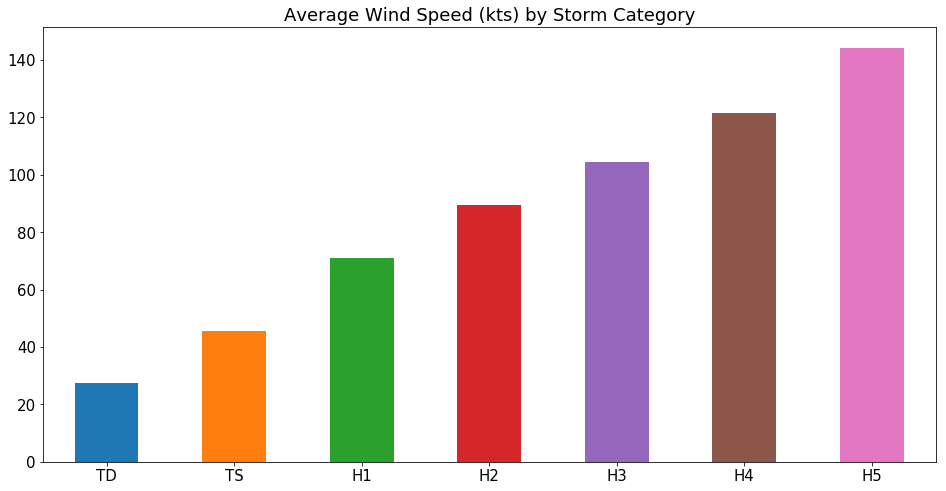

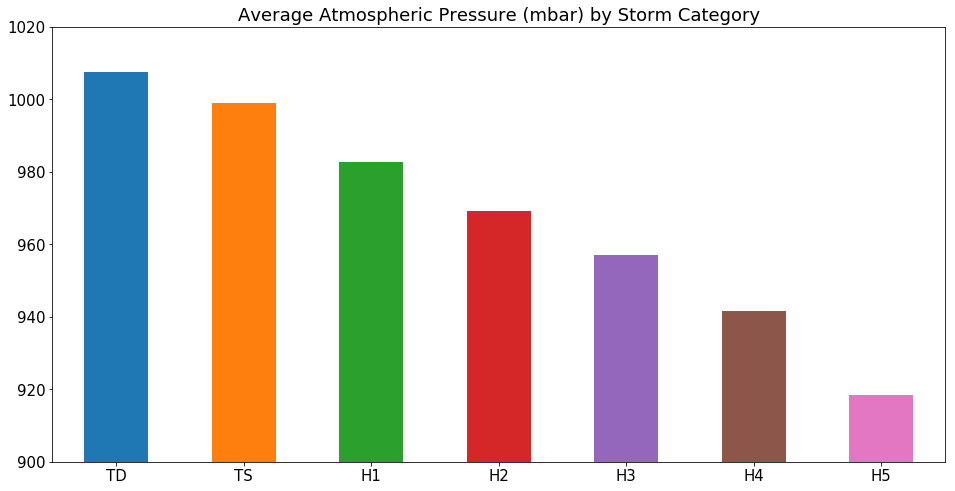

In [37]:
plt.rcParams.update({'font.size': 15})


ax1 = storm_data_by_category.plot.bar(x='category',
                                y='average_wind_speed',
                                figsize=(16,8),
                                title="Average Wind Speed (kts) by Storm Category"
                                )
plt.xticks(rotation=360)

ax2 = storm_data_by_category.plot.bar(x='category',
                                y='average_atmospheric_pressure',
                                figsize=(16,8),
                                title="Average Atmospheric Pressure (mbar) by Storm Category"
                                )

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

plt.xticks(rotation=360)

ax1.xaxis.set_label_text("")
ax2.xaxis.set_label_text("")

plt.ylim(900, 1020)

plt.show()

We can compare these results with the descriptions of the tropical cyclone categories here : https://en.wikipedia.org/wiki/Tropical_cyclone_scales

Here is another interesting article on storm measures : https://www.wired.com/2012/11/what-is-the-true-measure-of-a-storm/

## B) <a id='#subpart_two'>2005 : Record-Breaking Storm Season</a>

With 8 queries, we will analyse the year 2005 in the North Atlantic basin. Our analysis is inspired by this article : https://weather.com/storms/hurricane/news/2005-hurricane-season-by-the-numbers

### 1) <a id='#first_query'>Year with the Maximum Number of Storms in North Atlantic</a>

In [38]:
query_maximum_number_of_storms_north_atlantic = '''

WITH number_of_storms_by_year_north_atlantic_table AS 

(

SELECT 

EXTRACT(YEAR from date) "year",

COUNT(DISTINCT(name)) number_of_storms

FROM storm_table

WHERE basin = 'North Atlantic'

GROUP BY 1

)

SELECT 

year,

number_of_storms maximum_number_of_storms_north_atlantic

FROM 

number_of_storms_by_year_north_atlantic_table

WHERE number_of_storms = 

(

SELECT 

MAX(number_of_storms)

FROM 

number_of_storms_by_year_north_atlantic_table

)

;

'''

In [39]:
pd.read_sql_query(query_maximum_number_of_storms_north_atlantic,con=conn)

,year,maximum_number_of_storms_north_atlantic
0,2005.0,28


### 2) <a id='#second_query'>Number of Hurricanes in North Atlantic in 2005</a>

In [40]:
query_number_of_hurricanes_north_atlantic_2005 = '''

SELECT 

COUNT(DISTINCT(name)) number_of_hurricanes_north_atlantic_2005

FROM storm_table

WHERE basin = 'North Atlantic'

AND (cat = 'H1' OR cat = 'H2' OR cat = 'H3' OR cat = 'H4' OR cat = 'H5')

AND EXTRACT(YEAR from date) = 2005

;

'''

In [41]:
pd.read_sql_query(query_number_of_hurricanes_north_atlantic_2005,con=conn)

,number_of_hurricanes_north_atlantic_2005
0,15


### 3) <a id='#third_query'>Number of Category 5 Hurricanes in North Atlantic in 2005</a>

In [42]:
query_number_of_h5_hurricanes_north_atlantic_2005 = '''

SELECT 

COUNT(DISTINCT(name)) number_of_category_5_hurricanes_north_atlantic_2005

FROM storm_table

WHERE basin = 'North Atlantic'

AND cat = 'H5'

AND EXTRACT(YEAR from date) = 2005

;

'''

In [43]:
pd.read_sql_query(query_number_of_h5_hurricanes_north_atlantic_2005,con=conn)

,number_of_category_5_hurricanes_north_atlantic_2005
0,4


### 4) <a id='#fourth_query'>Storm Duration in North Atlantic in 2005</a>

To calculate the storm duration in North Atlantic in 2005, we will remove two outliers : the storms Zeta and Jose.

In [44]:
query_storm_duration_north_atlantic_2005 = '''

WITH north_atlantic_2005_table AS

(

SELECT 

*

FROM storm_table

WHERE basin = 'North Atlantic'

AND EXTRACT(YEAR FROM date) = 2005

ORDER BY date

)

SELECT 

name,

MIN(date) starting_date,

MAX(date) ending_date,

AGE(MAX(date), MIN(date)) storm_duration,

EXTRACT(DAY FROM AGE(MAX(date), MIN(date))) number_of_days

FROM north_atlantic_2005_table

WHERE name != 'ZETA' AND name != 'JOSE'

GROUP BY name

ORDER BY storm_duration DESC

;

'''

In [45]:
storm_duration_north_atlantic_2005_dataframe = pd.read_sql_query(query_storm_duration_north_atlantic_2005,con=conn)
storm_duration_north_atlantic_2005_dataframe

,name,starting_date,ending_date,storm_duration,number_of_days
0,OPHELIA,2005-09-06 06:00:00,2005-09-22 18:00:00,16 days 12:00:00,16.0
1,IRENE,2005-08-04 18:00:00,2005-08-18 06:00:00,13 days 12:00:00,13.0
2,DENNIS,2005-07-04 18:00:00,2005-07-18 00:00:00,13 days 06:00:00,13.0
3,MARIA,2005-09-01 12:00:00,2005-09-13 18:00:00,12 days 06:00:00,12.0
4,HARVEY,2005-08-02 18:00:00,2005-08-13 18:00:00,11 days 00:00:00,11.0
5,WILMA,2005-10-15 18:00:00,2005-10-26 12:00:00,10 days 18:00:00,10.0
6,EMILY,2005-07-11 00:00:00,2005-07-21 06:00:00,10 days 06:00:00,10.0
7,EPSILON,2005-11-29 06:00:00,2005-12-09 12:00:00,10 days 06:00:00,10.0
8,DELTA,2005-11-19 12:00:00,2005-11-29 12:00:00,10 days 00:00:00,10.0
9,FRANKLIN,2005-07-21 18:00:00,2005-07-30 18:00:00,9 days 00:00:00,9.0


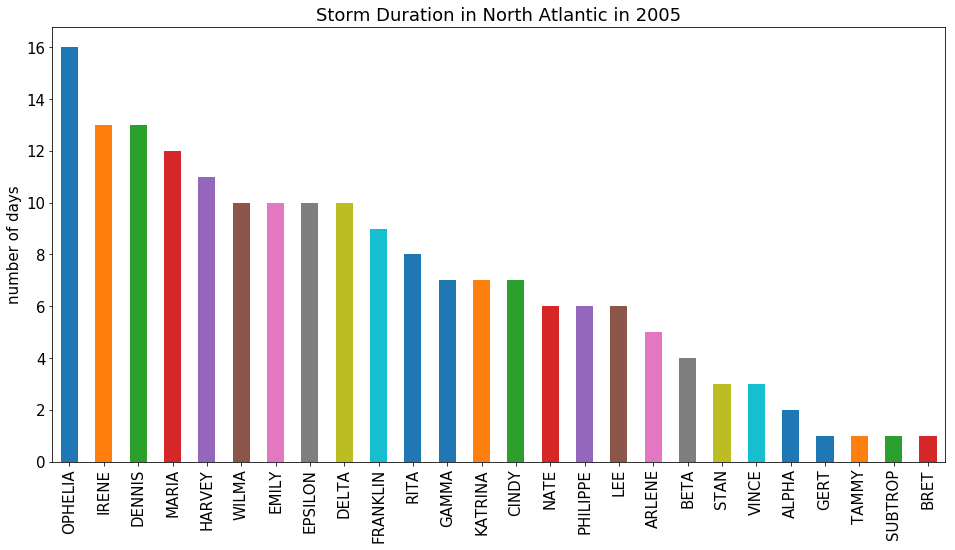

In [46]:
plt.rcParams.update({'font.size': 15})


ax = storm_duration_north_atlantic_2005_dataframe.plot.bar(x='name',
                                y='number_of_days',
                                figsize=(16,8),
                                title="Storm Duration in North Atlantic in 2005"
                                )

ax.legend().set_visible(False)

ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("number of days")

plt.show()

Let's now calculate the average storm duration in North Atlantic in 2005 : 

In [47]:
query_average_storm_duration_north_atlantic_2005 = '''

WITH north_atlantic_2005_table AS

(

SELECT 

*

FROM storm_table

WHERE basin = 'North Atlantic'

AND EXTRACT(YEAR FROM date) = 2005

ORDER BY date

),

storm_duration_north_atlantic_2005_table AS 

(

SELECT 

name,

MIN(date) starting_date,

MAX(date) ending_date,

AGE(MAX(date), MIN(date)) storm_duration,

EXTRACT(DAY FROM AGE(MAX(date), MIN(date))) number_of_days

FROM north_atlantic_2005_table

WHERE name != 'ZETA' AND name != 'JOSE'

GROUP BY name

ORDER BY storm_duration DESC

)

SELECT 

AVG(number_of_days) average_storm_duration_in_number_of_days

FROM storm_duration_north_atlantic_2005_table

;

'''

In [48]:
pd.read_sql_query(query_average_storm_duration_north_atlantic_2005,con=conn)

,average_storm_duration_in_number_of_days
0,7.0


We can see here that the storm Katrina matches the average storm duration of 7 days.

### 5) <a id='#fifth_query'>Storm with the Lowest Barometric Pressure in North Atlantic</a>

In [49]:
query_lowest_barometric_pressure_north_atlantic = '''

WITH north_atlantic_table AS

(

SELECT 

*

FROM storm_table

WHERE basin = 'North Atlantic'

AND pressure > 0

)

SELECT 

name,

cat category,

pressure,

date

FROM north_atlantic_table

WHERE pressure = 

(

SELECT 

MIN(pressure)

FROM north_atlantic_table

)

;

'''

In [50]:
pd.read_sql_query(query_lowest_barometric_pressure_north_atlantic,con=conn)

,name,category,pressure,date
0,WILMA,H5,882,2005-10-19 12:00:00


### 6) <a id='#sixth_query'>Total Number of Days with a Named Storm in North Atlantic during the 2005 season</a>

Let's find the total number of days with a named storm in the Atlantic basin during the 2005 season. The Atlantic season starts in June and runs until end of November. We will remove the categories E, W, L, SS, and SD from our analysis to keep only the relevant categories TD, TS, H1, H2, H3, H4, H5.

In [51]:
total_number_of_days_with_named_storm_north_atlantic_2005 = '''

WITH north_atlantic_2005_table AS

(

SELECT 

*

FROM storm_table

WHERE basin = 'North Atlantic'

AND EXTRACT(YEAR from date) = 2005

ORDER BY date

)

SELECT 

COUNT(DISTINCT(TO_CHAR(date, 'YYYY-MM-DD'))) total_number_of_days_with_named_storm__North_Altantic_2005

FROM 

north_atlantic_2005_table

WHERE date >= timestamp '2005-06-01 00:00:00' AND date < timestamp '2005-12-01 00:00:00'

AND cat != 'E'

AND cat != 'W'

AND cat != 'L'

AND cat != 'SS'

AND cat != 'SD'

;

'''

In [52]:
pd.read_sql_query(total_number_of_days_with_named_storm_north_atlantic_2005,con=conn)

,total_number_of_days_with_named_storm__north_altantic_2005
0,128


### 7) <a id='#seventh_query'>Hurricane Katrina </a>

In [53]:
query_katrina = '''

WITH north_atlantic_2005_table AS

(

SELECT 

*

FROM storm_table

WHERE basin = 'North Atlantic'

AND EXTRACT(YEAR from date) = 2005

ORDER BY date

)

SELECT 

wind_kts,

pressure,

cat category,

shape_leng shape_length,

date

FROM north_atlantic_2005_table

WHERE name = 'KATRINA'

;

'''

In [54]:
katrina_dataframe = pd.read_sql_query(query_katrina,con=conn)
katrina_dataframe

,wind_kts,pressure,category,shape_length,date
0,30,1008,TD,0.670820,2005-08-23 18:00:00
1,30,1007,TD,0.640312,2005-08-24 00:00:00
2,30,1007,TD,0.761577,2005-08-24 06:00:00
3,35,1006,TS,0.984886,2005-08-24 12:00:00
4,40,1003,TS,1.000000,2005-08-24 18:00:00
5,45,1000,TS,0.707107,2005-08-25 00:00:00
6,50,997,TS,0.608276,2005-08-25 06:00:00
7,55,994,TS,0.600000,2005-08-25 12:00:00
8,60,988,TS,0.761577,2005-08-25 18:00:00
9,70,983,H1,1.118034,2005-08-26 00:00:00


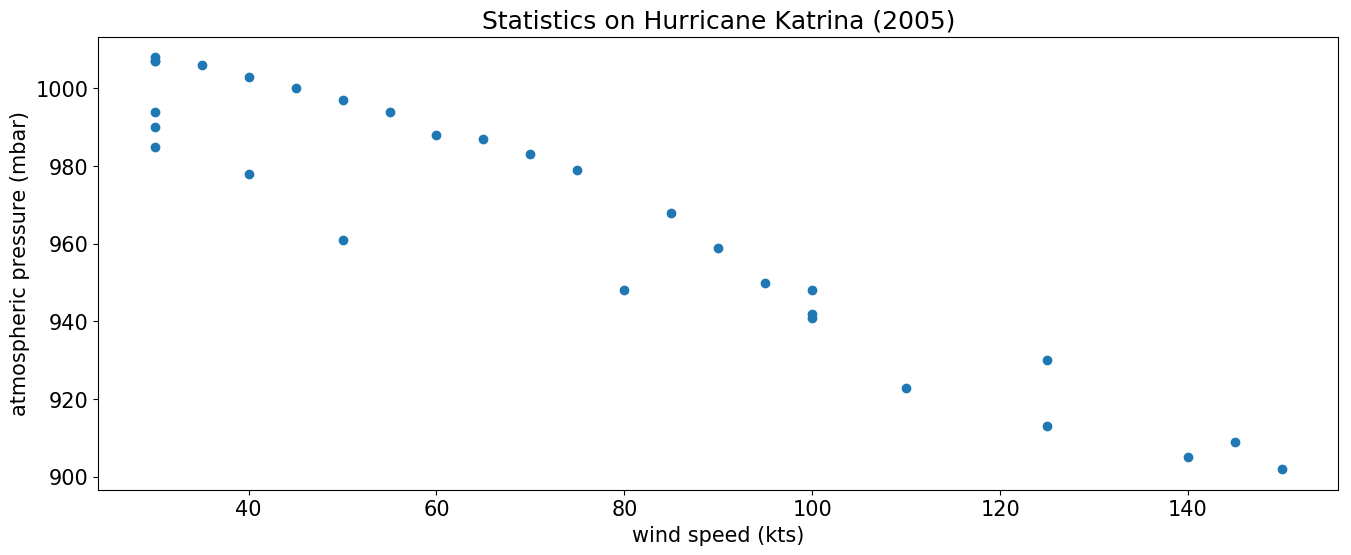

In [55]:
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=100)
plt.scatter(x = "wind_kts", y = "pressure", data = katrina_dataframe)
plt.title("Statistics on Hurricane Katrina (2005)")
plt.xlabel("wind speed (kts)")
plt.ylabel("atmospheric pressure (mbar)")
plt.show()

In [56]:
conn.close()